In [7]:
import arxiv
from datetime import date, datetime
import datetime as dt
import re
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date
import datetime as dt
from typing import List

In [2]:
H1_2017 = {
    'start': date(day=1, month=1, year=2017),
    'end': date(day=30, month=6, year=2017)
}
H2_2017 = {
    'start': date(day=1, month=7, year=2017),
    'end': date(day=31, month=12, year=2017)
}
H1_2018 = {
    'start': date(day=1, month=1, year=2018),
    'end': date(day=30, month=6, year=2018)
}
H2_2018 = {
    'start': date(day=1, month=7, year=2018),
    'end': date(day=31, month=12, year=2018)
}
H1_2019 = {
    'start': date(day=1, month=1, year=2019),
    'end': date(day=30, month=6, year=2019)
}
H2_2019 = {
    'start': date(day=1, month=7, year=2019),
    'end': date(day=31, month=12, year=2019)
}
H1_2020 = {
    'start': date(day=1, month=1, year=2020),
    'end': date(day=30, month=6, year=2020)
}
H2_2020 = {
    'start': date(day=1, month=7, year=2020),
    'end': date(day=31, month=12, year=2020)
}

Set up dictionaries to hold the paper dates.
We use dictionaries to ensure each paper id is counted only once.

In [3]:
h1_2017_papers = dict()
h2_2017_papers = dict()

h1_2018_papers = dict()
h2_2018_papers = dict()

h1_2019_papers = dict()
h2_2019_papers = dict()

h1_2020_papers = dict()
h2_2020_papers = dict()

Set up variables to count the computer vision papers.

In [4]:
h1_2017_papers_cv = dict()
h2_2017_papers_cv = dict()

h1_2018_papers_cv = dict()
h2_2018_papers_cv = dict()

h1_2019_papers_cv = dict()
h2_2019_papers_cv = dict()

h1_2020_papers_cv = dict()
h2_2020_papers_cv = dict()

In [24]:
def make_query(start):
    return(
    arxiv.query(
        query = 'cs.ai OR cs.cv OR cs.cl OR cs.lg OR cs.ro',
        start=start,
        max_results = None,
        max_chunk_results=3000,
        sort_by = 'submittedDate',
        sort_order = 'descending',
        iterative=True
    )
)

In [28]:
def parse_date(arxiv_pub_obj) -> date:
    date_string = arxiv_pub_obj['published']
    cleaned_date_string = re.search('\D*(\d+-\d+-\d+).*', date_string).group(1)
    return datetime.strptime(cleaned_date_string, '%Y-%m-%d').date()

def parse_categories(arxiv_pub_obj) -> List[str]:
    categories = []
    for tag in arxiv_pub_obj["tags"]:
        categories.append(tag["term"].lower())
    return categories

In [29]:
sleep_time = 3
post2017 = True
i = 0
out_of_date_streak = 0
while post2017:
    # Fetch a batch starting where we left off.
    results = make_query(i)
    
    for result in results():
        # Fetch the date submitted.
        submit_date = parse_date(result)
        categories = parse_categories(result)
        pub_id = result['id']
        
        # add it to the correct dictionary.
        if H1_2017['start'] <= submit_date <= H1_2017['end']:
            out_of_date_streak = 0
            h1_2017_papers[pub_id] = submit_date
            if "cs.cv" in categories:
                h1_2017_papers_cv[pub_id] = submit_date
        elif H2_2017['start'] <= submit_date <= H2_2017['end']:
            out_of_date_streak = 0
            h2_2017_papers[pub_id] = submit_date
            if "cs.cv" in categories:
                h2_2017_papers_cv[pub_id] = submit_date

        elif H1_2018['start'] <= submit_date <= H1_2018['end']:
            out_of_date_streak = 0
            h1_2018_papers[pub_id] = submit_date
            if "cs.cv" in categories:
                h1_2018_papers_cv[pub_id] = submit_date
        elif H2_2018['start'] <= submit_date <= H2_2018['end']:
            out_of_date_streak = 0
            h2_2018_papers[pub_id] = submit_date
            if "cs.cv" in categories:
                h2_2018_papers_cv[pub_id] = submit_date

        elif H1_2019['start'] <= submit_date <= H1_2019['end']:
            out_of_date_streak = 0
            h1_2019_papers[pub_id] = submit_date
            if "cs.cv" in categories:
                h1_2019_papers_cv[pub_id] = submit_date
        elif H2_2019['start'] <= submit_date <= H2_2019['end']:
            out_of_date_streak = 0
            h2_2019_papers[pub_id] = submit_date
            if "cs.cv" in categories:
                h2_2019_papers_cv[pub_id] = submit_date

        elif H1_2020['start'] <= submit_date <= H1_2020['end']:
            out_of_date_streak = 0
            h1_2020_papers[pub_id] = submit_date
            if "cs.cv" in categories:
                h1_2020_papers_cv[pub_id] = submit_date
        elif H2_2020['start'] <= submit_date <= H2_2020['end']:
            out_of_date_streak = 0
            h2_2020_papers[pub_id] = submit_date
            if "cs.cv" in categories:
                h2_2020_papers_cv[pub_id] = submit_date
        else:
            out_of_date_streak += 1
            print(f"Out of date streak is {out_of_date_streak}")
            if out_of_date_streak > 5:
                print("Breaking")
                post2017 = False
                break

        # Increment the counter to the next result.
        i += 1
        
        # Let the user know our progress.
        if i%3000 == 0:
            print('Parsed through ', str(i))
            print('On date ', submit_date)
    
    # Message that we are pausing.
    print('Pausing for ' + str(sleep_time) + ' seconds, Arxive needs a breather apparently.')
    time.sleep(sleep_time)
    sleep_time += 5

Parsed through  3000
On date  2020-10-29
Parsed through  6000
On date  2020-10-12
Pausing for 3 seconds, Arxive needs a breather apparently.
Parsed through  9000
On date  2020-09-21
Pausing for 8 seconds, Arxive needs a breather apparently.
Parsed through  12000
On date  2020-08-23
Parsed through  15000
On date  2020-07-27
Pausing for 13 seconds, Arxive needs a breather apparently.
Pausing for 18 seconds, Arxive needs a breather apparently.
Pausing for 23 seconds, Arxive needs a breather apparently.
Parsed through  18000
On date  2020-07-04
Parsed through  21000
On date  2020-06-14
Parsed through  24000
On date  2020-05-23
Parsed through  27000
On date  2020-04-29
Pausing for 28 seconds, Arxive needs a breather apparently.
Parsed through  30000
On date  2020-04-03
Parsed through  33000
On date  2020-03-06
Pausing for 33 seconds, Arxive needs a breather apparently.
Pausing for 38 seconds, Arxive needs a breather apparently.
Pausing for 43 seconds, Arxive needs a breather apparently.
Par

KeyboardInterrupt: 

### H1 2017 Results.

Total

In [30]:
len(h1_2017_papers.values())

0

Proportion that is computer vision.

In [31]:
len(h1_2017_papers_cv.values()) / len(h1_2017_papers.values())

ZeroDivisionError: division by zero

Histogram where each bin represents roughly a week.

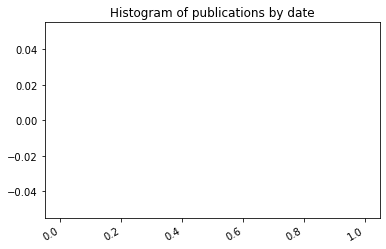

In [32]:
fig, ax = plt.subplots()
ax.hist(h1_2017_papers.values(), bins=14, color='#ff7433')
ax.set_title("Histogram of publications by date")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter("%y-%m-%d")

### H2 2017 Results.

In [33]:
len(h2_2017_papers.values())

0

Proportion that is computer vision.

In [34]:
len(h2_2017_papers_cv.values()) / len(h2_2017_papers.values())

ZeroDivisionError: division by zero

Histogram where each bin represents roughly a week.

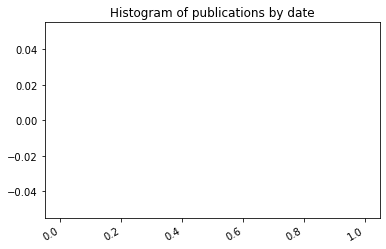

In [35]:
fig, ax = plt.subplots()
ax.hist(h2_2017_papers.values(), bins=14, color='#ff7433')
ax.set_title("Histogram of publications by date")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter("%y-%m-%d")

### H1 2018 Results.

Total

In [36]:
len(h1_2018_papers.values())

0

Proportion that is computer vision.

In [37]:
len(h1_2018_papers_cv.values()) / len(h1_2018_papers.values())

ZeroDivisionError: division by zero

Histogram where each bin represents roughly a week.

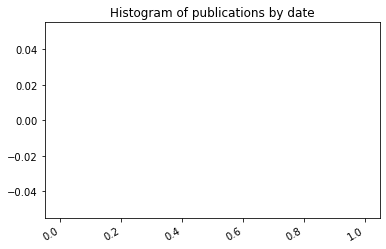

In [38]:
fig, ax = plt.subplots()
ax.hist(h1_2018_papers.values(), bins=14, color='#ff7433')
ax.set_title("Histogram of publications by date")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter("%y-%m-%d")

### H2 2018 Results.

In [39]:
len(h2_2018_papers.values())

0

Proportion that is computer vision.

In [40]:
len(h2_2018_papers_cv.values()) / len(h2_2018_papers.values())

ZeroDivisionError: division by zero

Histogram where each bin represents roughly a week.

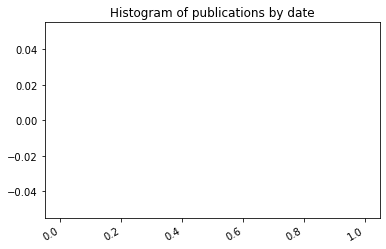

In [41]:
fig, ax = plt.subplots()
ax.hist(h2_2018_papers.values(), bins=14, color='#ff7433')
ax.set_title("Histogram of publications by date")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter("%y-%m-%d")

### H1 2019 Results.

Total

In [42]:
len(h1_2019_papers.values())

0

Proportion that is computer vision.

In [43]:
len(h1_2019_papers_cv.values()) / len(h1_2019_papers.values())

ZeroDivisionError: division by zero

Histogram where each bin represents roughly a week.

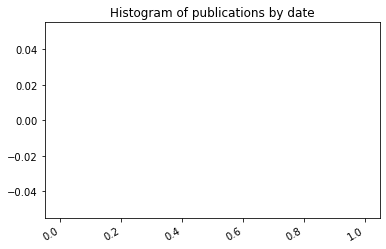

In [44]:
fig, ax = plt.subplots()
ax.hist(h1_2019_papers.values(), bins=14, color='#ff7433')
ax.set_title("Histogram of publications by date")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter("%y-%m-%d")

### H2 2019 Results.

In [45]:
len(h2_2019_papers.values())

10667

Proportion that is computer vision.

In [46]:
len(h2_2019_papers_cv.values()) / len(h2_2019_papers.values())

0.33580200618730666

Histogram where each bin represents roughly a week.

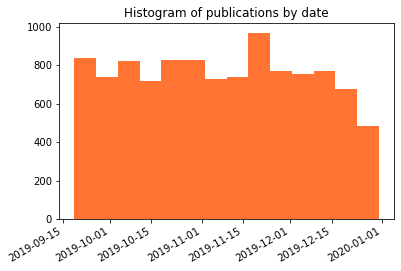

In [47]:
fig, ax = plt.subplots()
ax.hist(h2_2019_papers.values(), bins=14, color='#ff7433')
ax.set_title("Histogram of publications by date")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter("%y-%m-%d")

### H1 2020 Results.

Total

In [48]:
len(h1_2020_papers.values())

20806

Proportion that is computer vision.

In [49]:
len(h1_2020_papers_cv.values()) / len(h1_2020_papers.values())

0.33115447467076803